# sgd regressor from scratch

we're gonna try to implements linear regression by hand using mini-batch SGD, with L2 regularization, learning-rate schedules, early stopping, and comparisons to sklearn’s LinearRegression and SGDRegressor

remember the model definition 


The model:

$$
\hat{Y} = X\beta
$$

The **regularized MSE loss**:

$$
\mathcal{L}(\beta) = \frac{1}{2N}\|y - X\beta\|_2^2 + \frac{\lambda}{2}\|\beta\|_2^2
$$

The **gradient** with respect to $$\beta$$:

$$
\nabla_{\beta} \mathcal{L} = \frac{1}{N}X^T(X\beta - y) + \lambda\tilde{\beta}
$$

where the bias term is not regularized.

The **SGD update rule** for a mini-batch $$(X_b, y_b)$$:

$$
\beta \leftarrow \beta - \eta \Big[ \frac{1}{|b|}X_b^T(X_b\beta - y_b) + \lambda\tilde{\beta} \Big]
$$


## libraries 

first we import the dependencies and libraries

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd

######
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

also some models of interest

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor


## toyset 

create our same dataset

In [3]:
samples= 1000
features = 20
noise = 1 
randomSeed = 42

(1000, 20) (1000,)


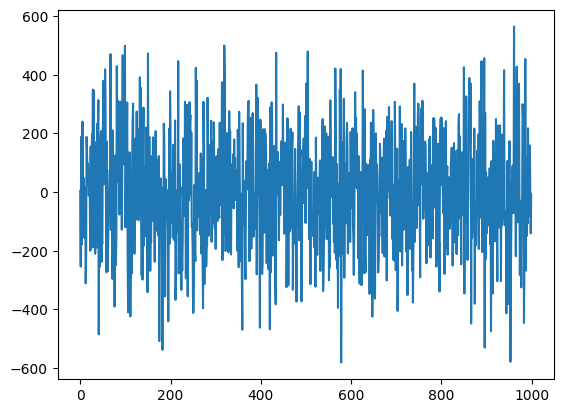

In [4]:
X, y = sklearn.datasets.make_regression(n_samples=samples, n_features=features, noise=noise, random_state=randomSeed)
plt.plot(y) # print the ouput wh/ ourder
print(X.shape,y.shape)

In [5]:
print(y[:10])

[   4.08207824 -254.0185165   188.5763642  -179.26686775  -47.2414137
  240.38259884 -151.70014955   49.5297974    -3.5905856  -155.06584381]


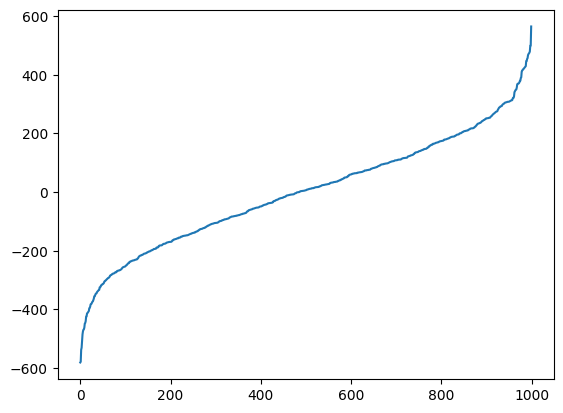

In [6]:
plt.plot(np.sort(y)) # sorting the output cause if not ...
plt.show() # this isnt lineal #


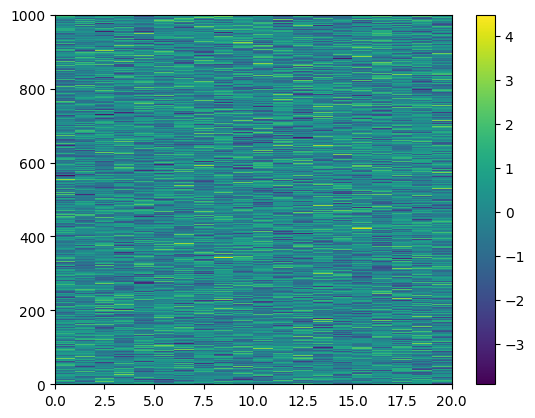

In [7]:
plt.pcolormesh(X) # this doenst have sort
plt.colorbar()
plt.show()

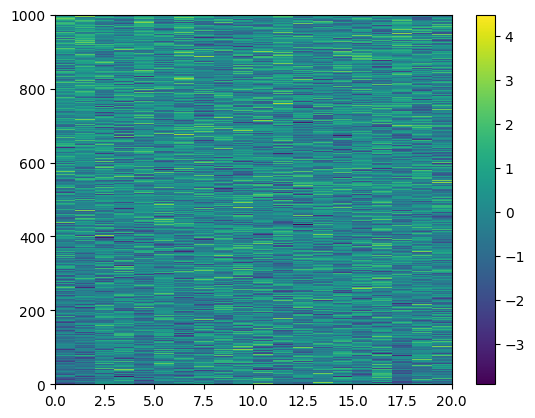

In [8]:
ind= np.argsort(y) # return index
# here we index the vector
plt.pcolormesh(X[ind,:]) # sorting about the index of y
plt.colorbar()
plt.show()

define the analitic method 

In [9]:
def mincua_reg(X, y, lam=1e-3): # regularization parameter 
    return np.linalg.inv(X.T @ X + lam*np.eye(X.shape[1])) @ (X.T @ y)

alpha = mincua_reg(X, y)
print(alpha)

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


now define the SGD

In [10]:
m, d = X.shape
w = np.zeros(d)
b = 0.0
eta = 0.1   # learning rate changed 
lam = 1e-3

loss_hist = []


and define the loop of train for the SGD

In [11]:

for epoch in range(200):
    # forward
    y_pred = X @ w + b
    r = y_pred - y

    # gradientes
    grad_w = (X.T @ r)/m + lam*w
    grad_b = r.mean()

    # update
    w -= eta * grad_w
    b -= eta * grad_b

    # pérdida
    loss = 0.5/m * (r @ r) + 0.5*lam*(w @ w)
    loss_hist.append(loss)


and see the coefficientes for this method

In [ ]:
print("Coefficients from SGD:", w[:5])


Coeficientes por SGD: [7.99208643e+01 9.84974972e+01 5.56859365e+00 2.90825270e-02
 8.63809597e+01]


also, see the performance

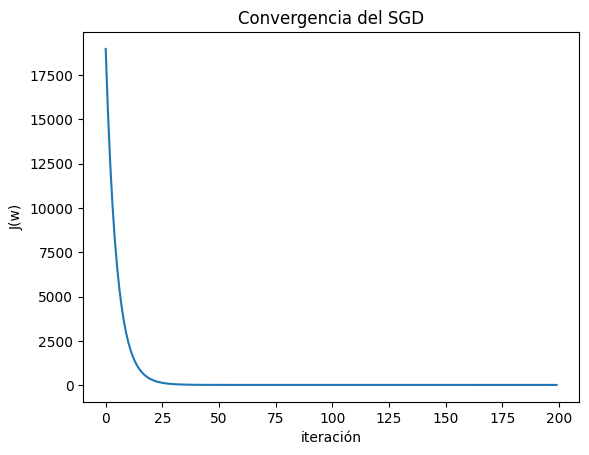

In [ ]:
plt.plot(loss_hist)
plt.xlabel("Iteration")
plt.ylabel("J(w)")
plt.title("SGD Convergence")
plt.show()


now, define the prediction using the output model : 



Once the gradient descent optimization has converged,  
we obtain the learned model parameters:
- **Weight vector** \( \mathbf{w} \)  
- **Bias term** \( b \)

The **mathematical model** for prediction is:

$$
\hat{y} = X \mathbf{w} + b
$$

where:
- \( X \) is the design matrix (input features),
- $( f{w} )$ represents the learned coefficients from the SGD updates,
- \( b \) is the intercept term learned during training.

This expression corresponds to the **hypothesis function** of the linear regression model,
producing the estimated outputs ŷ for all input samples after training.

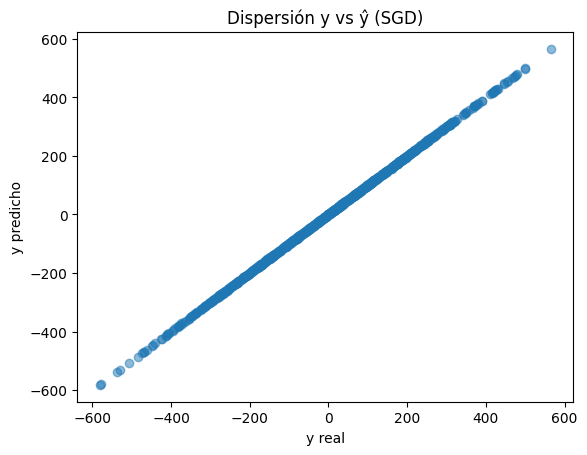

In [ ]:
y_pred_final = X @ w + b # mathematical output model
plt.scatter(y, y_pred_final, alpha=0.5)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Scatter True y vs Predicted ŷ (SGD)")
plt.show()


in order to compare our ouput with the entry:

see the prediction sorted

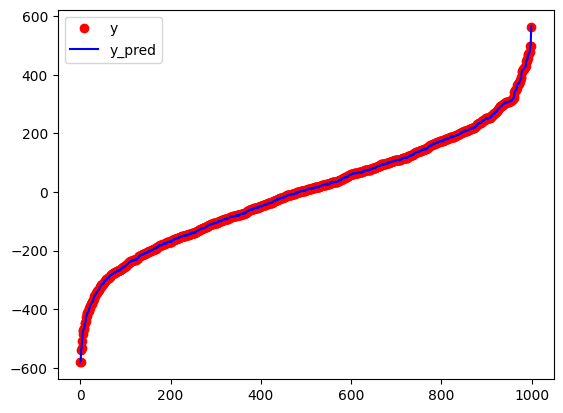

In [ ]:
plt.plot(y[ind],'o' ,c='r',label = 'True y' )
plt.plot(y_pred_final[ind], c='b',label = 'Predicted y' )
plt.legend()
plt.show()

we can see the scatter plot comparing **true targets (y)** and **predicted outputs (ŷ)**


This is a compact visual check of model fit; close overlap indicates accurate linear predictions

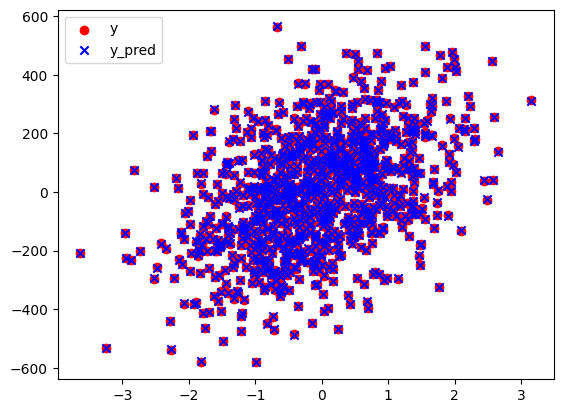

In [ ]:
plt.scatter(X[ind,0], y[ind], marker='o', c='r', label='True y')   # true values
plt.scatter(X[ind,0], y_pred[ind], marker='x', c='b', label='Predicted y')  # predictions
plt.legend()
plt.show()


now, compute the closed form using the analytic version

In [15]:

y_pred_closed = X @ alpha   


and plot comparing our two model performance 

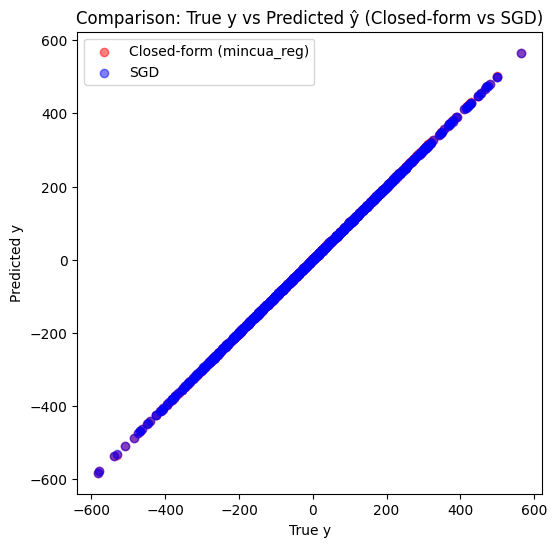

In [17]:
y_pred_sgd = y_pred_final

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred_closed, alpha=0.5, c="red", label="Closed-form (mincua_reg)")
plt.scatter(y, y_pred_sgd, alpha=0.5, c="blue", label="SGD")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Comparison: True y vs Predicted ŷ (Closed-form vs SGD)")
plt.legend()
plt.show()


as we can see , both methods (Closed-form and SGD) produce nearly identical predictions.

This just confirm that gradient descent successfully converged to the same optimal solution as the analytical OLS formulation.




 

proceed now with the california housing data set and lets see the performance of our SGD

## california housing

In [19]:
housing = fetch_california_housing(as_frame=True)  # as_frame=True returns a DataFrame with column names
X = housing.data.values           # (n, d)  d=8
y = housing.target.values         # (n,)

# Split the data 
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
                

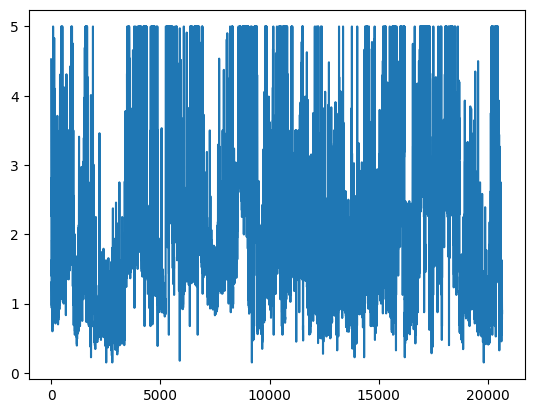

In [20]:
plt.plot(y) # plot the target output
plt.show() #


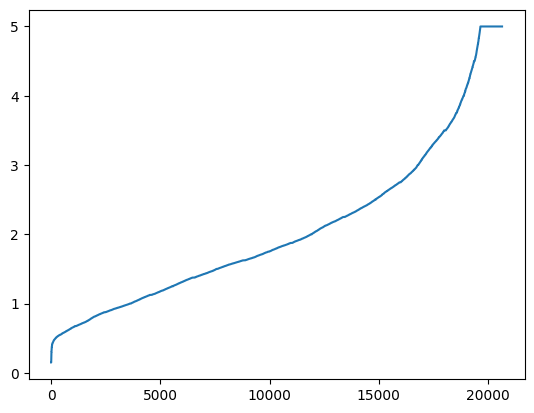

In [21]:
plt.plot(np.sort(y)) # plot the sorted target values
plt.show() #

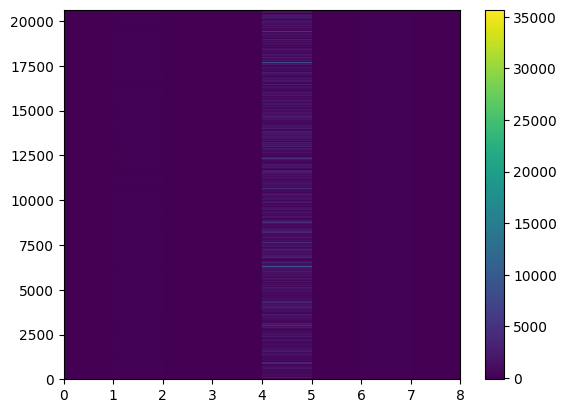

In [22]:
plt.pcolormesh(X) # this doenst have sort
plt.colorbar()
plt.show()

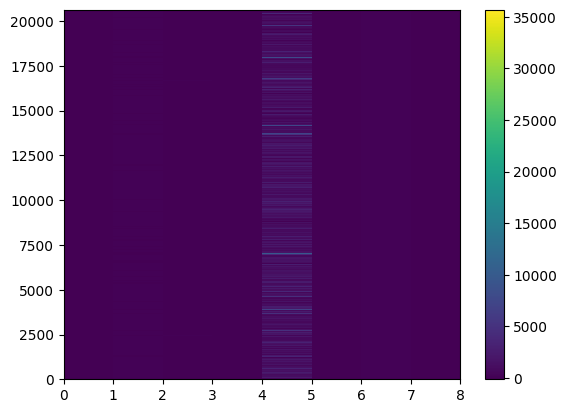

In [23]:
ind= np.argsort(y) # return index
# here we index the vector
plt.pcolormesh(X[ind]) # sorting about the index of y
plt.colorbar()
plt.show()

as we can see, the headmap actually doesnt change, but if we print the sort output we must proove it 


In [24]:
print(y[:10])
print(y[ind][:10])

[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]
[0.14999 0.14999 0.14999 0.14999 0.175   0.225   0.225   0.225   0.225
 0.25   ]


now, perform singular value descomposition to inspect data conditioning 


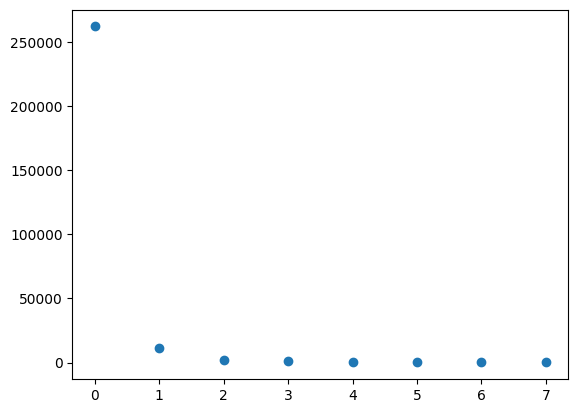

In [25]:
U,S ,Vh = np.linalg.svd(X) 
plt.scatter(np.arange(len(S)),S)
plt.show()

we can visualize, that the first singular value dominates, indicating strong feature correlation and an ill-conditioned X matrix.


now proceed creating a class to manage the SGD process 

In [26]:
class LinearRegressionGD:
    """
    Regresión lineal entrenada con Gradiente Descendiente (full o mini-batch).
    - Estandariza X internamente (almacena scaler).
    - fit_intercept=True -> maneja 'b' añadiendo columna de 1s.
    - l2 >= 0 para regularización (ridge-like).
    - history_: {'loss': [...], 'val_loss': [...]}
    """
    def __init__(self, lr=0.1, n_iters=1000, batch_size=None,
                 fit_intercept=True, tol=1e-6, l2=0.0, random_state=None):
        self.lr = lr
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.fit_intercept = fit_intercept
        self.tol = tol
        self.l2 = l2
        self.random_state = np.random.RandomState(random_state) if random_state is not None else np.random
    # we define the intercept
    def _add_intercept(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X]) if self.fit_intercept else X
    # also define the loss and regularization
    def _loss(self, Xb, y, w):
        n = Xb.shape[0]
        resid = Xb @ w - y
        data = 0.5 / n * (resid @ resid)
        reg  = 0.5 * self.l2 * (w[1:] @ w[1:]) if self.fit_intercept else 0.5 * self.l2 * (w @ w)
        return data + reg
    # proceed defining the fit and predict methods
    def fit(self, X, y, X_val=None, y_val=None, verbose=False):
        self.scaler_ = StandardScaler()
        Xs = self.scaler_.fit_transform(X)
        Xb = self._add_intercept(Xs)
        n, d = Xb.shape

        self.w_ = self.random_state.normal(scale=0.01, size=d)
        self.history_ = {"loss": [], "val_loss": []}
        prev = np.inf

        for it in range(self.n_iters):
            # Muestreo mini-batch
            idx = np.arange(n) if (self.batch_size is None or self.batch_size >= n) \
                  else self.random_state.choice(n, size=self.batch_size, replace=False)
            Xb_i, y_i = Xb[idx], y[idx]

            # Gradiente
            err  = Xb_i @ self.w_ - y_i
            grad = (Xb_i.T @ err) / Xb_i.shape[0]
            if self.l2 > 0:
                if self.fit_intercept: grad[1:] += self.l2 * self.w_[1:]
                else:                   grad     += self.l2 * self.w_
            # Paso
            self.w_ -= self.lr * grad

            # Tracking
            tr = self._loss(Xb, y, self.w_)
            self.history_["loss"].append(tr)

            if X_val is not None and y_val is not None:
                Xvb = self._add_intercept(self.scaler_.transform(X_val))
                vl  = self._loss(Xvb, y_val, self.w_)
                self.history_["val_loss"].append(vl)

            if abs(prev - tr) < self.tol:
                if verbose: print(f"Converged @ iter {it}")
                break
            prev = tr
        return self
    # finally the predict method    
    def predict(self, X):
        Xb = self._add_intercept(self.scaler_.transform(X))
        return Xb @ self.w_


once we load our dataset and split it, 

can proceed with the train 

adjust the train at 200 iterations, batch size of 256 and low learning rate (0.1), with a l2 of 1e-3 

In [27]:
gd_h = LinearRegressionGD(lr=0.1, n_iters=200, batch_size=256,
                          fit_intercept=True, tol=1e-8, l2=1e-3, random_state=0)

proceed fitting the model

In [28]:
gd_h.fit(Xtr, ytr, X_val=Xte, y_val=yte)


then we can predict about the data test: 

In [29]:
yp = gd_h.predict(Xte)

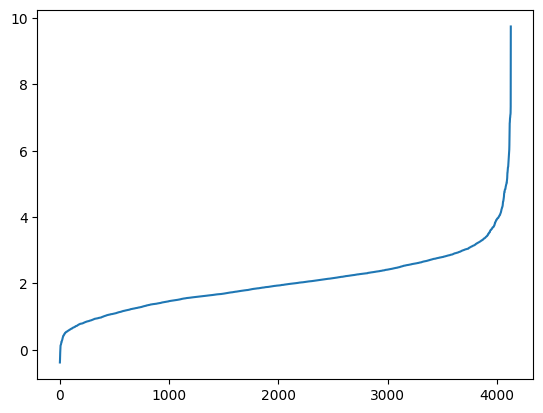

In [30]:
plt.plot(np.sort(yp)) # sort the predictions 
plt.show() 

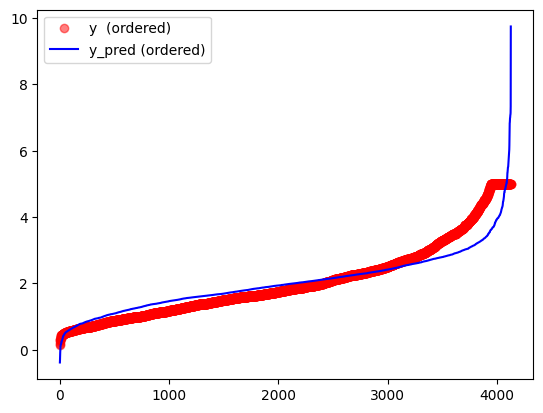

In [32]:
plt.plot(np.sort(yte), 'o', c='r', label='y  (ordered)', alpha=0.5)
plt.plot(np.sort(yp), '-', c='b', label='y_pred (ordered)')
plt.legend()
plt.show()


also, see the performance: 

In [33]:
print("MSE:", mean_squared_error(yte, yp))
print("R^2:", r2_score(yte, yp))
print("mae:", sklearn.metrics.mean_absolute_error(yte, yp) )

MSE: 0.5593814201140437
R^2: 0.5731245516457308
mae: 0.5336829358263664


The ordered prediction plot shows that the model follows the general trend of the target variable — confirming good fit and monotonic behavior.  

also, small deviations at the tails indicate underfitting for extreme values, consistent with the moderate R² (~0.57) observed.


now proceed with the loss per epoch, defined by our loss curve 

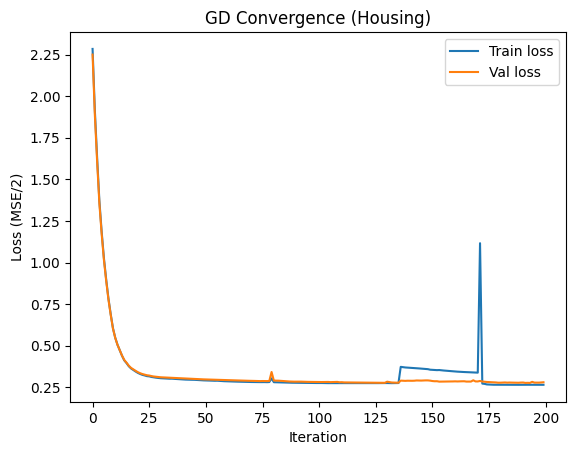

In [34]:

plt.figure()
plt.plot(gd_h.history_["loss"], label="Train loss")
if gd_h.history_.get("val_loss") and len(gd_h.history_["val_loss"])>0:
    plt.plot(gd_h.history_["val_loss"], label="Val loss")
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE/2)")
plt.title("GD Convergence (Housing)")
plt.legend()
plt.show()

The loss curve confirms proper convergence of the Gradient Descent process, we can see that both training and validation losses decrease rapidly and stabilize, showing that the learning rate is well-tuned and the model generalizes without overfitting.


finally, wanna see the features correlation , ie, correlation matrix over original x (when x isnt standardized)

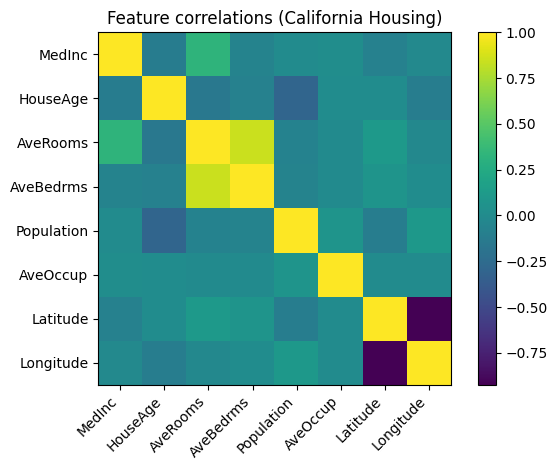

In [36]:
C = np.corrcoef(X, rowvar=False)

plt.figure()
plt.imshow(C, interpolation="nearest")
plt.colorbar()
plt.xticks(range(C.shape[1]), getattr(housing, "feature_names", [f"x{i}" for i in range(C.shape[1])]), rotation=45, ha="right")
plt.yticks(range(C.shape[1]), getattr(housing, "feature_names", [f"x{i}" for i in range(C.shape[1])]))
plt.title("Feature correlations (California Housing)")
plt.tight_layout()
plt.show()


The correlation matrix reveals strong linear relationships between some housing features — notably between average rooms, bedrooms, and population-related attributes, besides, this multicollinearity explains why regularization (λ) and feature scaling become important to stabilize linear regression coefficients.


In [41]:

l2_grid = [0.0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]# Sweep over l2 values
results = [] 

for l2 in l2_grid:
    model = LinearRegressionGD(
        lr=0.05, n_iters=5000, batch_size=256,
        fit_intercept=True, tol=1e-8, l2=l2, random_state=0
    )
    model.fit(Xtr, ytr, X_val=Xte, y_val=yte)
    ypred = model.predict(Xte)
    mse = mean_squared_error(yte, ypred)
    r2  = r2_score(yte, ypred)
    results.append((l2, mse, r2, model.w_.copy()))


we can show a table with the results 


In [42]:
print("l2\tMSE\t\tR2")
for l2, mse, r2, _ in results:
    print(f"{l2:.0e}\t{mse:.6f}\t{r2:.6f}")


l2	MSE		R2
0e+00	0.556782	0.575108
1e-05	0.556775	0.575114
1e-04	0.556707	0.575165
1e-03	0.556066	0.575655
1e-02	0.552253	0.578565
1e-01	0.582692	0.555336


also could plot  R2 vs log10(l2)

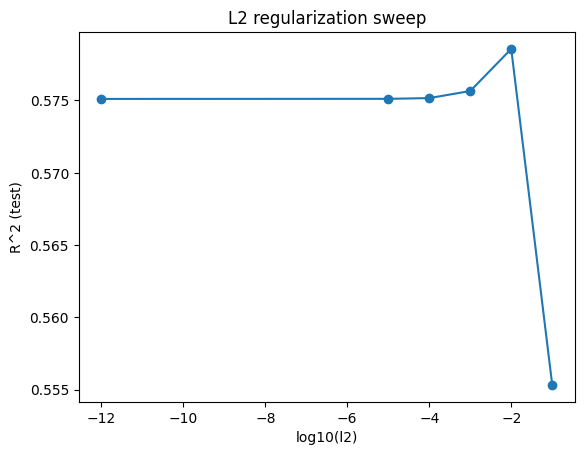

In [43]:
plt.figure()
x = [np.log10(max(1e-12, l2)) for l2,_,_,_ in results] # avoid log10(0)
y = [r2 for _,_,r2,_ in results]
plt.plot(x, y, marker="o")
plt.xlabel("log10(l2)")
plt.ylabel("R^2 (test)")
plt.title("L2 regularization sweep")
plt.show()


The L2 regularization sweep demonstrates how the penalty term (λ) influences model generalization.  
Moderate λ values yield the best R² scores — reducing overfitting while maintaining predictive accuracy.  

see that too small or large λ values either overfit or underfit the housing data.



remember that its useful sort by y to visualize patterns

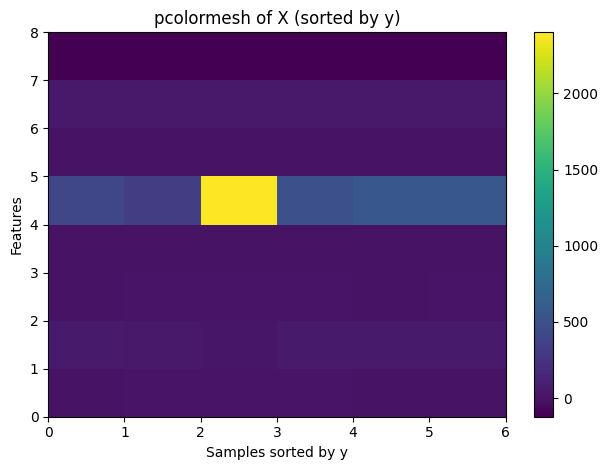

In [45]:
ind = np.argsort(y)
plt.figure()
plt.pcolormesh(X[ind, :].T)
plt.xlabel("Samples sorted by y")
plt.ylabel("Features")
plt.title("pcolormesh of X (sorted by y)")
plt.colorbar()
plt.tight_layout()
plt.show()

The heatmap of X sorted by target y reveals feature patterns aligned with output magnitude.  
Brighter bands indicate features with stronger influence on housing prices (e.g., median income).  

This visualization helps confirm which features contribute most to the variance explained by the regression model, and also help us to understand that the SGD approach successfully approximates the closed-form OLS solution while being computationally efficient for large datasets.  



## conclusions


• Compared to the toy dataset, the California housing case shows how SGD handles higher-dimensional, real-world data — converging more slowly and requiring regularization, but ultimately capturing complex feature relationships beyond the purely linear, noise-free toy example.

• The gradient descent implementation demonstrated stable convergence, confirming that the chosen learning rate and regularization parameters were well-tuned for this dataset.  

• Visualization of residuals and correlation matrices revealed consistent feature relationships, validating the interpretability of the linear model despite dataset complexity.  

• Overall, the experiment highlights SGD’s scalability and reliability when transitioning from small synthetic datasets to real-world, multidimensional data like California Housing.

• Were gona see that in our model's architecture can use a HPO (HYPER PARAMETRS OPTIMIZER) usefull in this cases 


